In [ ]:
# CNN for MNIST dataset

In [2]:
# Split the data into training and test sets.
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [3]:
# Create Model and Add Layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [4]:
# Compile and Fit Model
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 - 18s - loss: 0.2437 - accuracy: 0.9270 - val_loss: 0.0863 - val_accuracy: 0.9724 - 18s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 22s - loss: 0.0866 - accuracy: 0.9730 - val_loss: 0.0640 - val_accuracy: 0.9799 - 22s/epoch - 12ms/step
Epoch 3/5
1875/1875 - 23s - loss: 0.0674 - accuracy: 0.9794 - val_loss: 0.0569 - val_accuracy: 0.9804 - 23s/epoch - 12ms/step
Epoch 4/5
1875/1875 - 22s - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0467 - val_accuracy: 0.9836 - 22s/epoch - 12ms/step
Epoch 5/5
1875/1875 - 26s - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0461 - val_accuracy: 0.9839 - 26s/epoch - 14ms/step


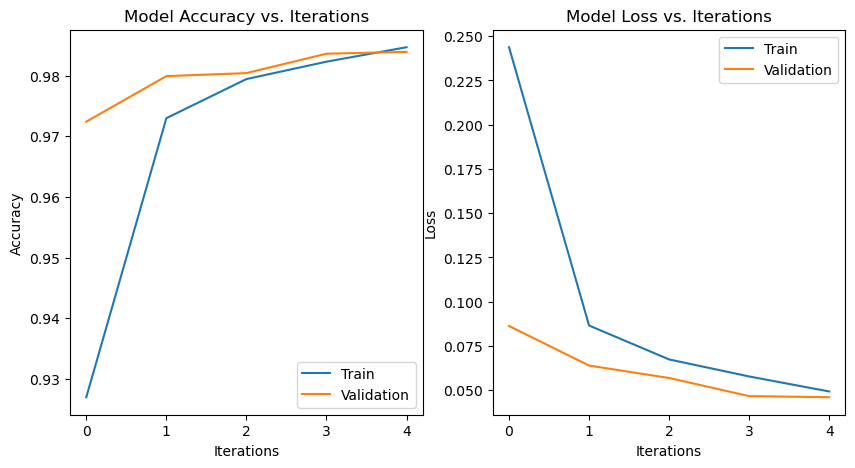

In [5]:
# Plot the accuracy and loss curves for training and validation
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()